Для решения предложенных заданий используются JupyterLab, Python, numpy, Pandas, scikit-learn, PyTorch, matplotlib, seaborn. 

Предавительно все данные экспортировальсь из Excel в CSV файлы(приложенны в архив). <br>
part1_data.csv - Данные задания №1<br>
part2_data.csv - Данные задания №2<br>
part3_data.csv - Данные задания №3<br>
part5_data.csv - Данные задания №5<br>


## Задание 1


Задача 1

В соответствии со стандартами обслуживания  клиентов среднее время ожидания клиентом ответа оператора не должно превышать 20 секунд. Для проверки качества обслуживания клиентов была проанализирована выборка из 30 звонков. На основе представленных данных можно ли утверждать, что  среднее время ожидания ответа оператора возросло и составляет более 20 секунд (допуская, что данные в генеральной совокупности имеют нормальное распределение).

Задача 2

Предположим, что необходимо оценить текущее среднее значение времени ответа оператора с точностью +/- 2 секунды и построить 95% доверительный интервал для этой величины. Определите, требуемый для этого объем выборки.


In [1]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as csipy

#Загружаем данные, удостоверяемся, что загрузилось верно 
data = pd.read_csv('part1_data.csv', delimiter=";")
#data.info()
#data.head(5)
#data.count()
data.columns

Index(['ind', 'time'], dtype='object')

### Решение задачи 1:

In [2]:
#Среднее время ответа оператора
mean = data['time'].mean()
print('Среднее значение времемя ожидания клиента: {:.4f}'.format(mean))

Среднее значение времемя ожидания клиента: 22.8333


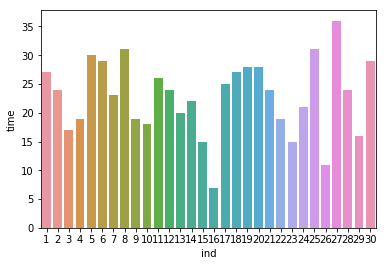

In [3]:
# построим график времение ответа операттора(предполагаем что данные представленны в хронологическом порядке)
sns.barplot(x=data['ind'], y=data['time'])

Отвечая на врпрос задачи: мы не можем сказать увеличилось ли время ответа оператора(отсутствуют данные предыдущих наблидений). При этом среднее время ответа оператора: 22,83 секунды.

### Решение задачи 2 (Задание 1):

Для того что-бы найти объем выборки необходимый для построения 95% доверительного интервала
воспользуемся формулой для оценки формулы интервальной оценки(предельной ошибки): 

\begin{equation*}
E = Z_{val}  \frac{\sigma }{\sqrt{n}}
\end{equation*}

$ 
где \\
Z_{val} - \text{z-score, z-оценка}
\\
\sigma - \text{стандартное (среднеквадратичное) отклонение}
\\
n - \text{объем выборки}
\\
\text{}
$

преобразуем формулу, выразим n:

\begin{equation*}
n =  ( \frac{Z_{val} \sigma}{ E } )^2   
\end{equation*}

$ 
\text{В данном случае:}
\\
\text{E = 2 (точность +/- 2 секунды) }
\\
Z_{val}\text{ = 1.96 (для заданного доверительного уровня по таблице, в расчетах используем значение из scipy) }
\\
\text{Найдем стандартное отклонение. Далее, подставив все значения найдем необходимый объем выборки}
$




In [5]:
E = 2
CONFIDENCE = 0.95

#Преобразуем Pandas DataSet -> numpy array
np_data = data['time'].to_numpy()

#найдем z score
z = csipy.stats.norm.ppf( 1- (1-CONFIDENCE)/2 )
print("z: {:.4f}".format(z))

#Найдем стандартное отклонение (numpy) 
sd = np_data.std()
print("sd: {:.4f}".format(sd))

#Найдем значение n
n = (z * sd / E)**2
print("n: {:.4f}".format(n))


z: 1.9600
sd: 6.3670
n: 38.9321


Округляем n до ближайшего большего, и тогда объем выборки необходимый для построения 95% доверительного интервала будет равен : 39